In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
articles_abs6 = ['peng2012','kulak2014','lahtvee2017','dibartolomeo2018','yu2020','yu2021','ho2018']
articles_aus2 = ['degodoy2008','lee2011', 'nagaraj2011', 'thakur2011']

In [3]:
yeast_db = pd.read_excel('../data/yeast/yeast_db.xlsx')
yeast_db_ribo = pd.read_excel('../data/yeast/yeast_db_ribo.xlsx')

In [4]:
articles_abs5 = [pd.read_excel(f'../data/yeast/processed/{i}_processed.xlsx') for i in articles_abs6]

In [7]:
articles_aus = [pd.read_excel(f'../data/yeast/processed/{i}_processed.xlsx') for i in articles_aus2]

In [9]:
total_proteins = [len(i) for i in articles_abs + articles_aus]

In [10]:
total_proteins

[4248, 4514, 1784, 3797, 3368, 3118, 5381, 4026, 2319, 4051, 2896]

In [14]:
intersection_abs = set.intersection(*[set(i['Entry'].tolist()) for i in articles_abs[:-1]])

In [17]:
len(set.intersection(*[set(i['Entry'].tolist()) for i in articles_abs[:-1]+articles_aus]))

1103

In [15]:
plt.style.use('../config/paper_protein_content.mplstyle')

In [189]:
total_cns = [i['Copies/cell'].sum() for i in articles_abs5]

In [190]:
total_cns

[49999999.9999999,
 43095823.62858285,
 94004610.62746428,
 184266621.667202,
 50331197.67006183,
 55291809.52537056,
 40378388.926788256]

In [58]:
total_cns_vol = [i/42 for i in total_cns]

In [59]:
total_cns_vol

[1190476.1904761882,
 1026091.0387757821,
 2238205.0149396257,
 1198361.8492871863,
 1316471.6553659658,
 961390.2125425775]

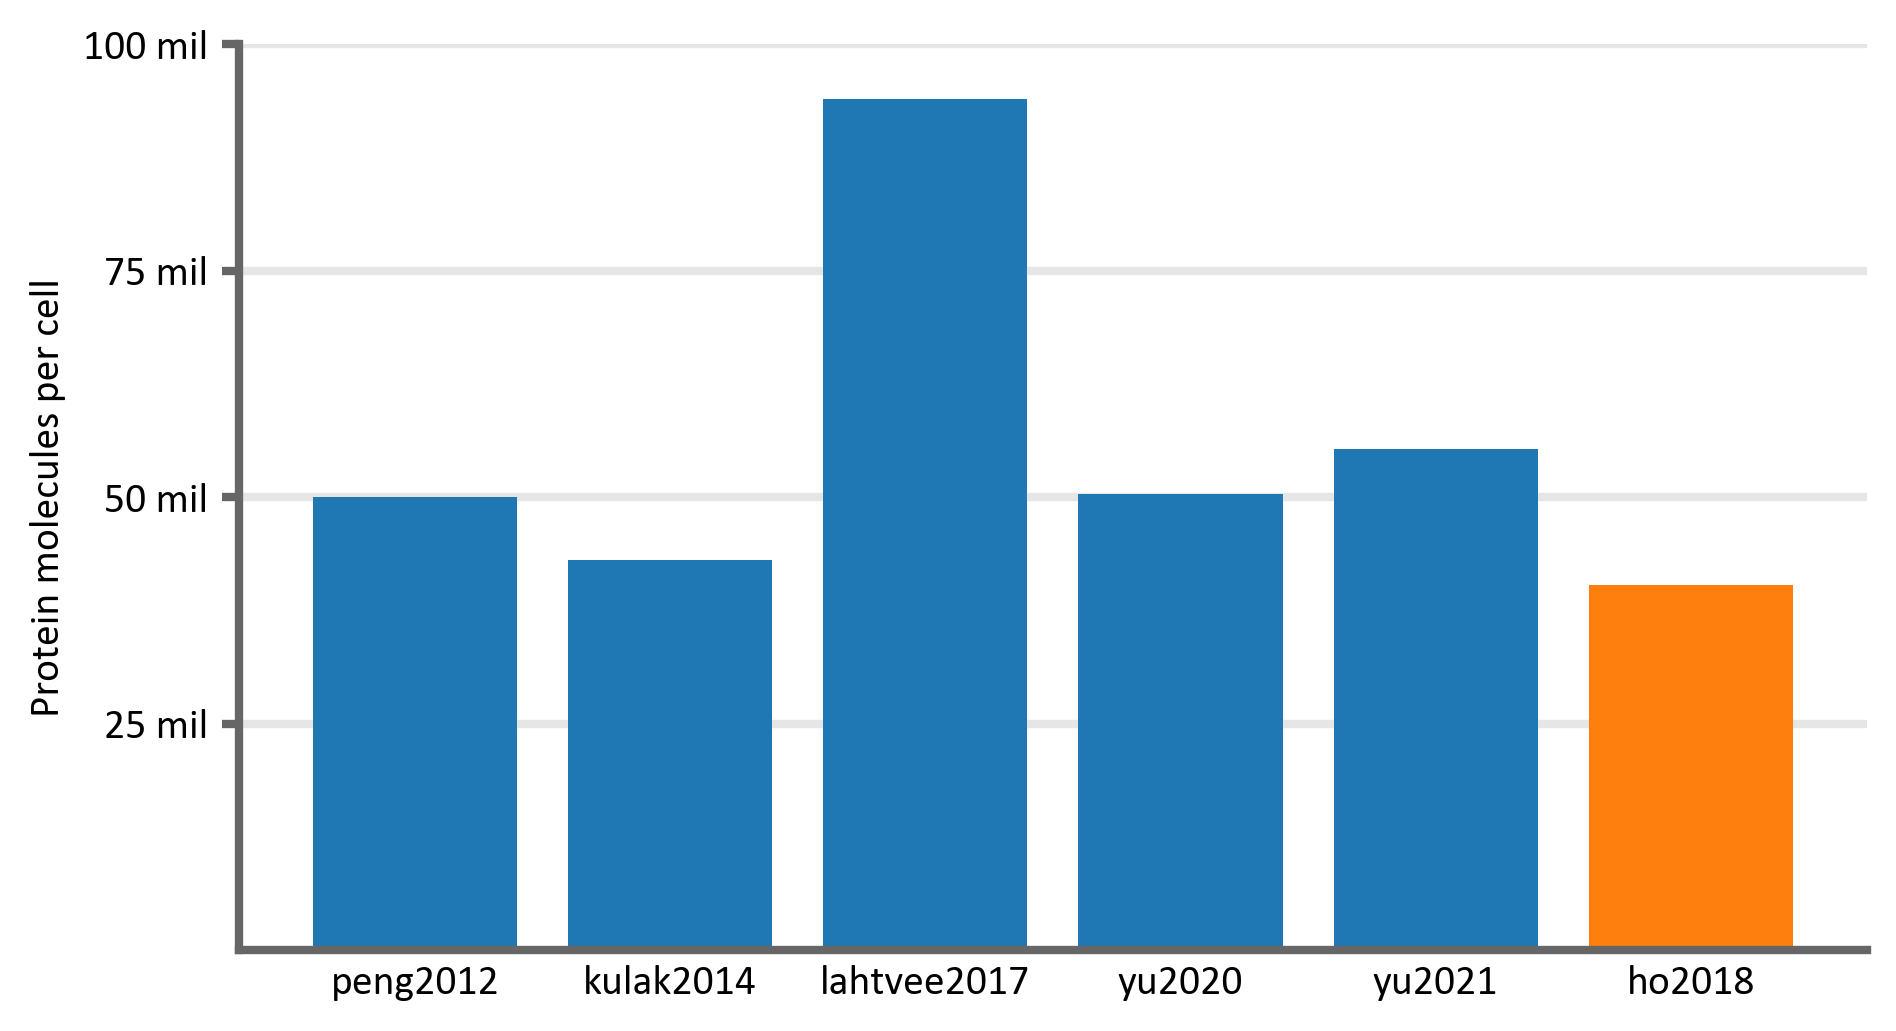

In [65]:
plt.figure(figsize=(7,4))
plt.bar(range(len(total_cns)-1), total_cns[:-1], color='C0')
plt.bar(len(total_cns)-1, total_cns[-1], color='C1')
plt.xticks(range(len(total_cns)), articles_abs2)
plt.yticks([25e6, 50e6, 75e6, 100e6], ['25 mil', '50 mil', '75 mil', '100 mil'])
plt.ylabel('Protein molecules per cell')
plt.savefig('../graphs/2_1_proteins_per_cell.png')

In [82]:
total_cns_core2 = [i['Copies/cell'].sum() for i in [i[i['Entry'].isin(intersection_abs3)] for i in articles_abs3]]

In [68]:
total_cns_core

[29369523.085437257,
 30378347.353428356,
 81472889.35883032,
 28330590.003560767,
 33913636.92686297,
 21372521.24175962]

In [69]:
articles_abs3 = articles_abs.copy()

In [71]:
articles_abs3.pop(2)

,Entry,Copies/cell
0,P32471,589409.934490
1,P39704,11804.257183
2,P31373,175294.490410
3,P31377,1500.294212
4,P31383,11230.307260
...,...,...
1779,P15303,24925.266925
1780,P14020,111269.891746
1781,P20435,3084.922593
1782,P17883,1264.069003


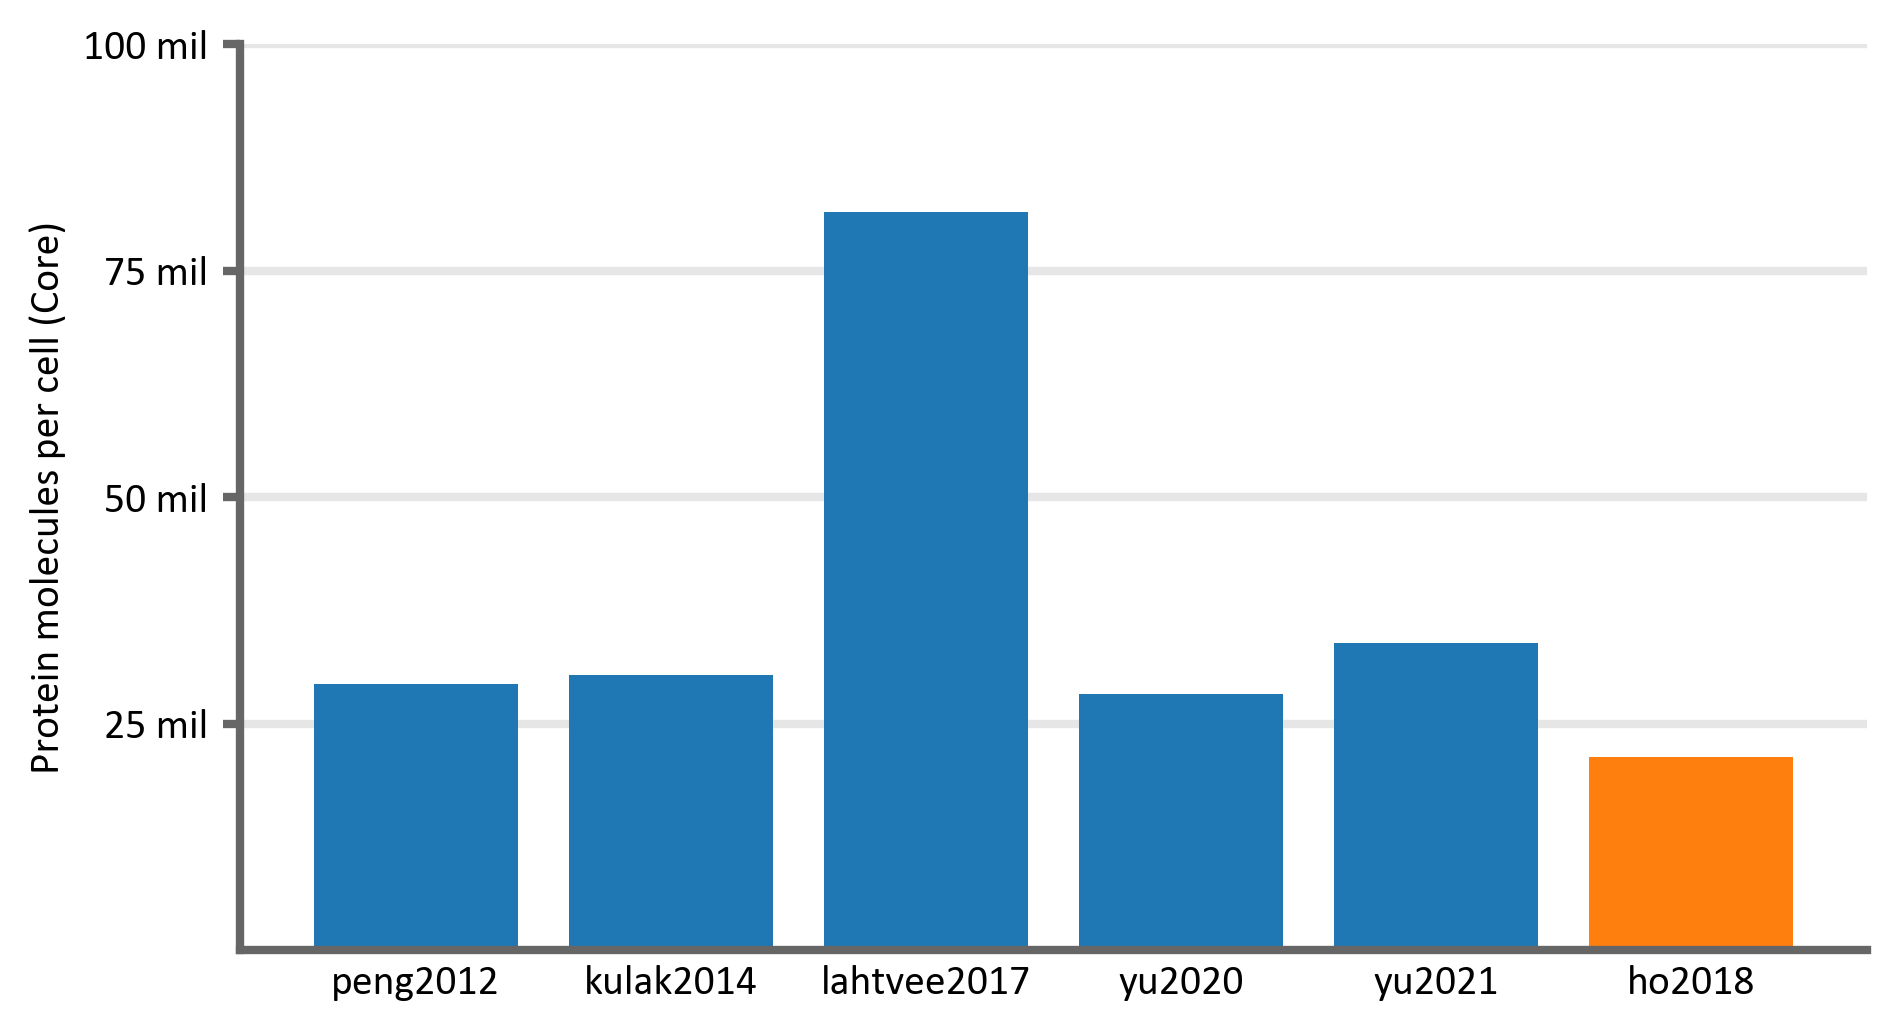

In [73]:
plt.figure(figsize=(7,4))
plt.bar(range(len(total_cns)-1), total_cns_core[:-1], color='C0')
plt.bar(len(total_cns)-1, total_cns_core[-1], color='C1')
plt.xticks(range(len(total_cns)), articles_abs2)
plt.yticks([25e6, 50e6, 75e6, 100e6], ['25 mil', '50 mil', '75 mil', '100 mil'])
plt.ylabel('Protein molecules per cell (Core)')
plt.savefig('../graphs/2_2_proteins_per_cell_core.png')

In [74]:
total_cns_core2 = total_cns_core

In [75]:
total_cns_core2.pop(2)

81472889.35883032

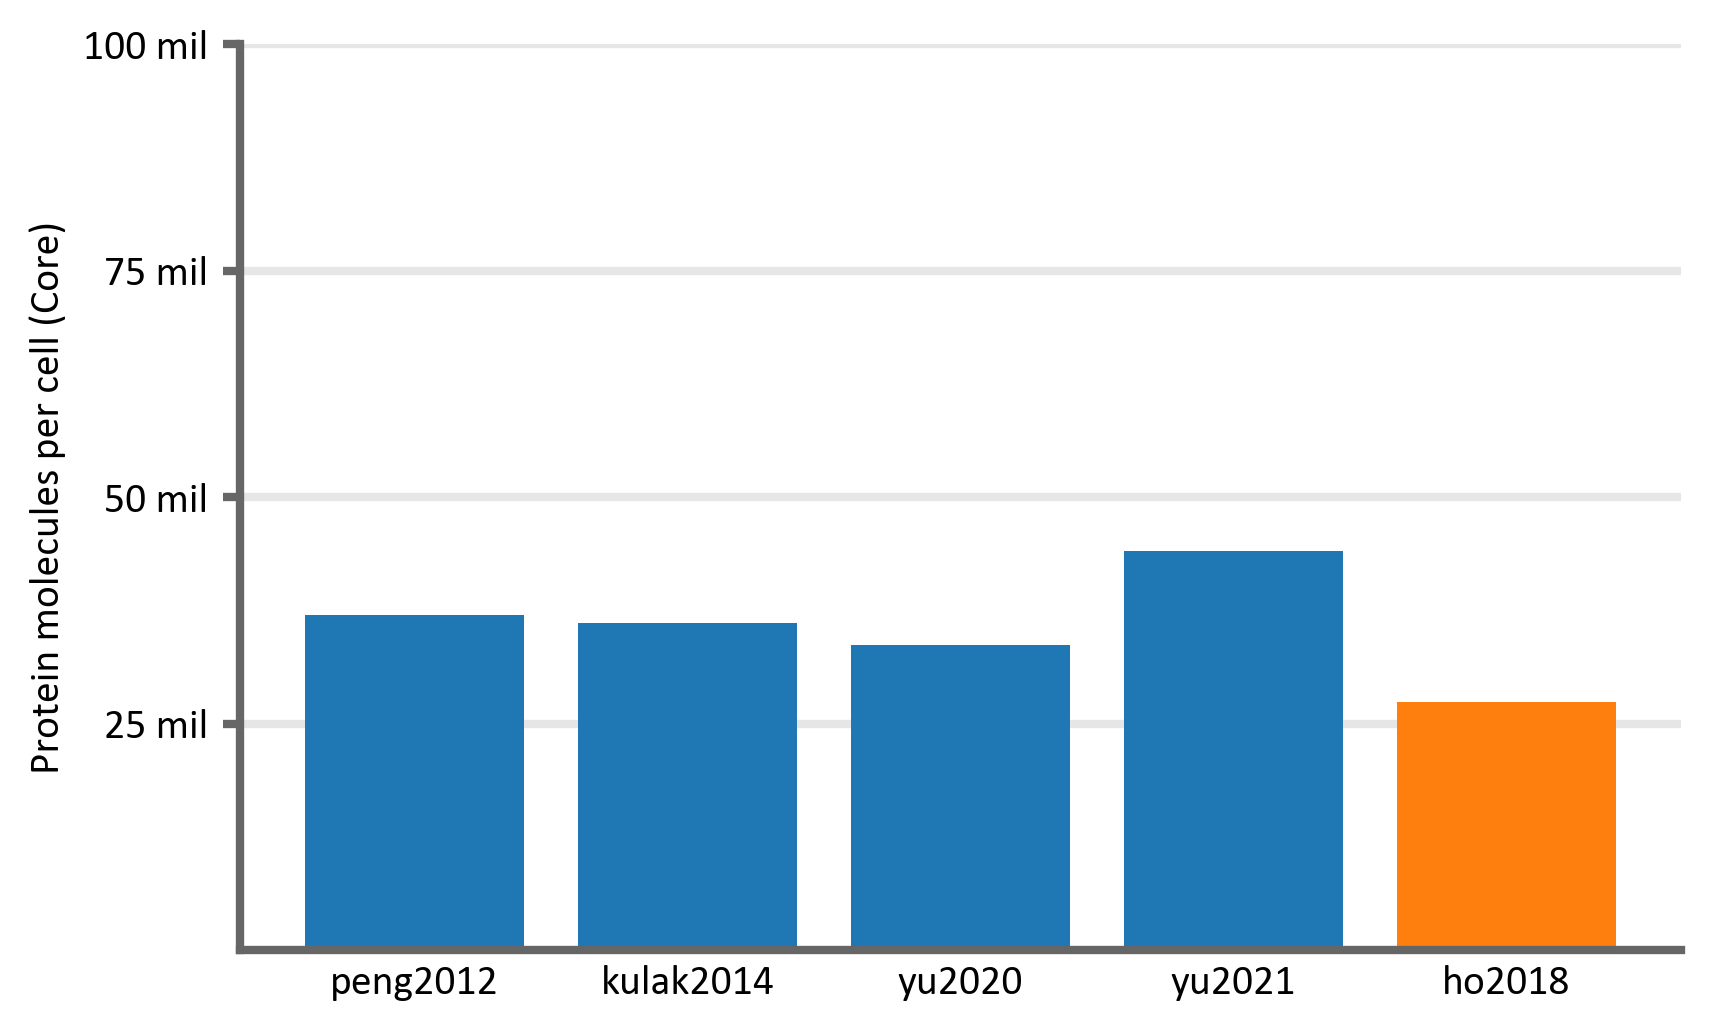

In [85]:
plt.figure(figsize=(6.2,4))
plt.bar(range(len(total_cns_core2)-1), total_cns_core2[:-1], color='C0')
plt.bar(len(total_cns)-2, total_cns_core2[-1], color='C1')
plt.xticks(range(len(total_cns_core2)), articles_abs2_l)
plt.yticks([25e6, 50e6, 75e6, 100e6], ['25 mil', '50 mil', '75 mil', '100 mil'])
plt.ylabel('Protein molecules per cell (Core)')
plt.savefig('../graphs/2_3_proteins_per_cell_core_2.png')

In [78]:
articles_abs2_l = articles_abs2

In [79]:
articles_abs2_l.pop(2)

'lahtvee2017'

In [81]:
intersection_abs3 = set.intersection(*[set(i['Entry'].tolist()) for i in articles_abs3])

In [130]:
articles_abs_ln = [np.log10(i[i['Copies/cell'] > 1.0]['Copies/cell']) for i in articles_abs5]

In [17]:
articles_abs6[3]='\ndibartolomeo2018'

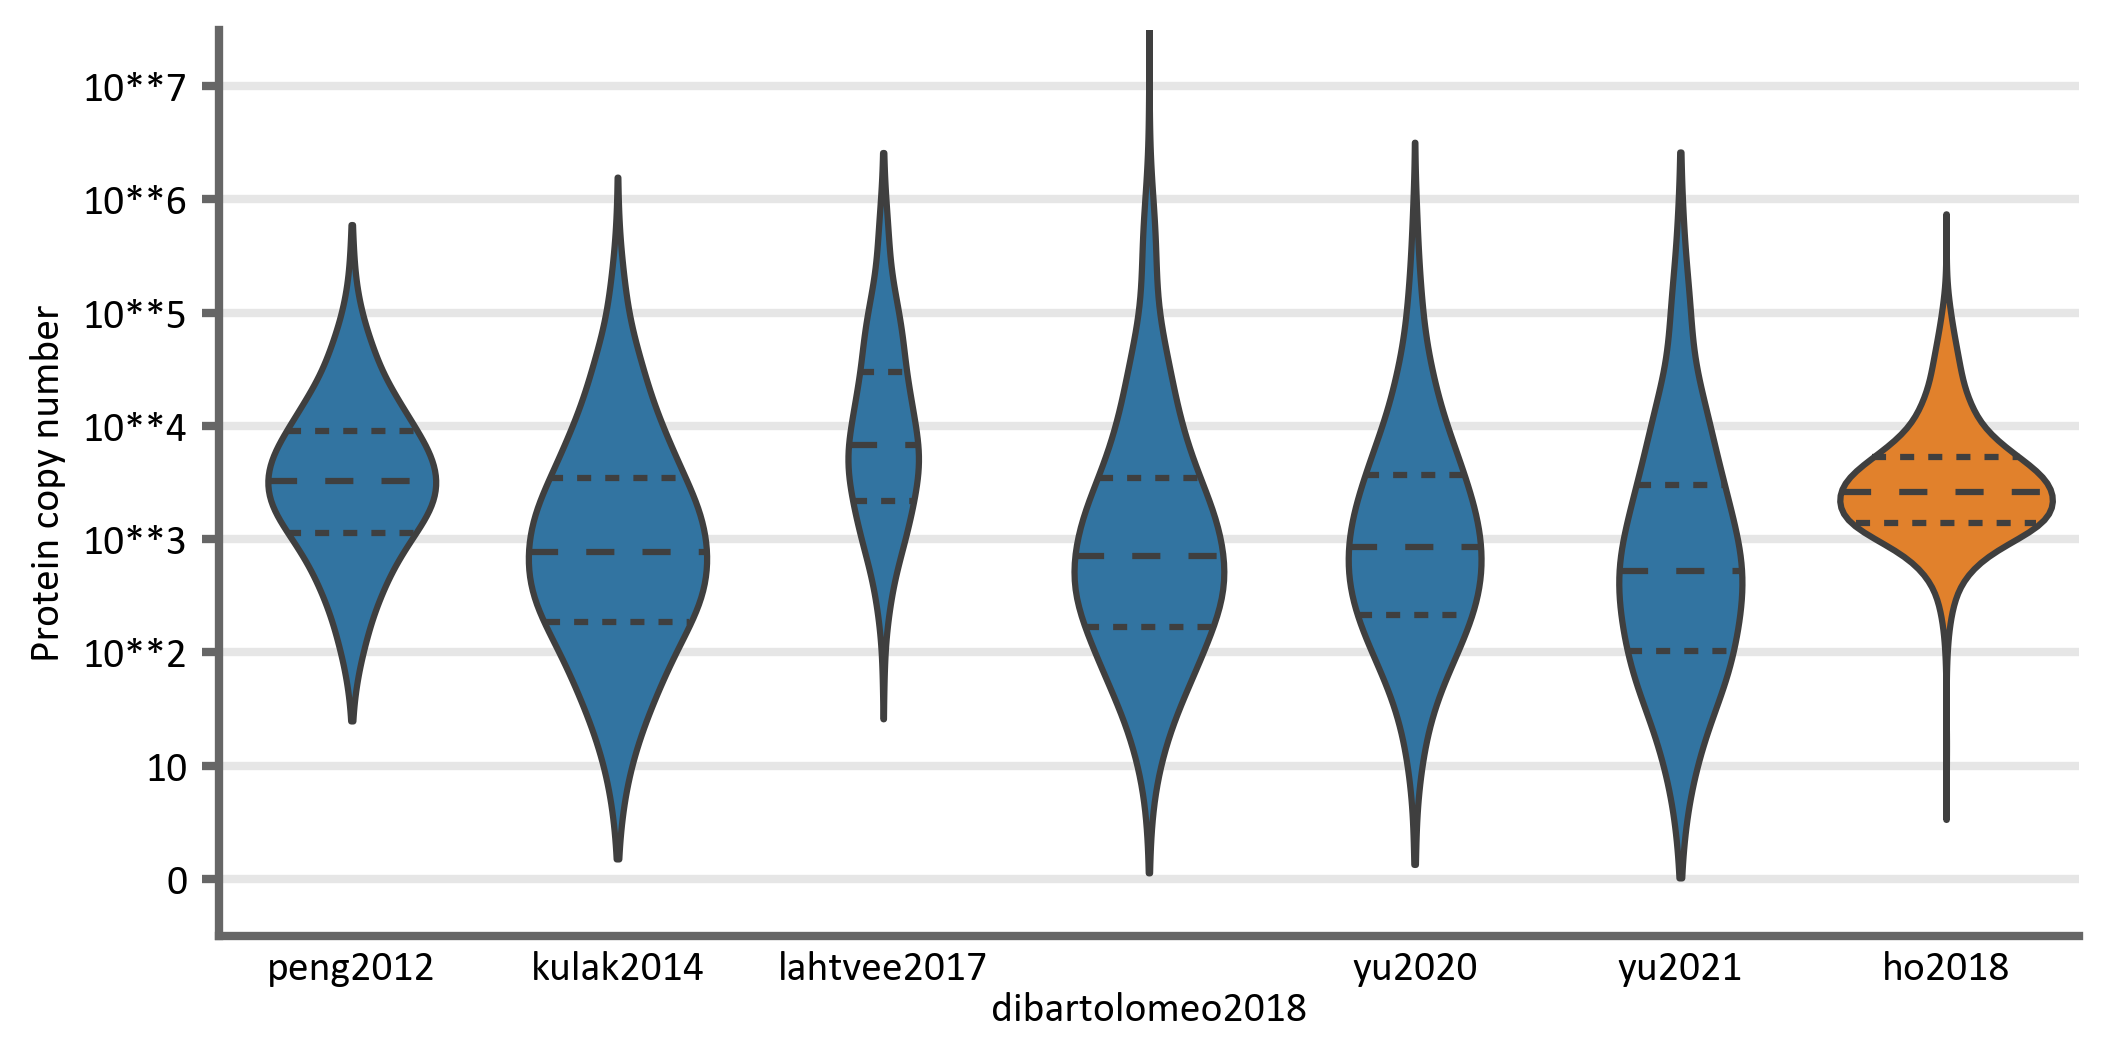

In [157]:
plt.figure(figsize=(8,4))
plt.ylim([-0.5,7.5])
plt.yticks(range(8), ['0', '10', '10**2', '10**3', '10**4', '10**5', '10**6', '10**7'])
sn.violinplot(data=articles_abs_ln, inner='quartiles', cut=0, scale='count', bw=0.3, palette=['C0','C0','C0','C0','C0','C0','C1'])
plt.xticks(range(len(articles_abs5)), articles_abs6)
plt.ylabel('Protein copy number')
plt.savefig('../graphs/2_4s_cns_distribution.png')

In [158]:
quantiles = [np.quantile(i['Copies/cell'], [0.25, 0.5, 0.75]) for i in articles_abs5]

In [159]:
quantiles

[array([1146.15490379, 3257.77603303, 9106.96454207]),
 array([ 186.43307526,  777.61057688, 3491.74794758]),
 array([ 2161.8639107,  6851.1835639, 29746.3541635]),
 array([ 167.74227082,  709.87761498, 3451.97183402]),
 array([ 213.59610421,  847.63331225, 3698.54818924]),
 array([ 103.12464534,  521.16230193, 2986.00891456]),
 array([1390.        , 2611.33912703, 5334.37198947])]

In [133]:
articles_aus_lg = [np.log10(i[i['Intensity'] > 1.0]['Intensity']) for i in articles_aus]

<Figure size 1800x1200 with 0 Axes>

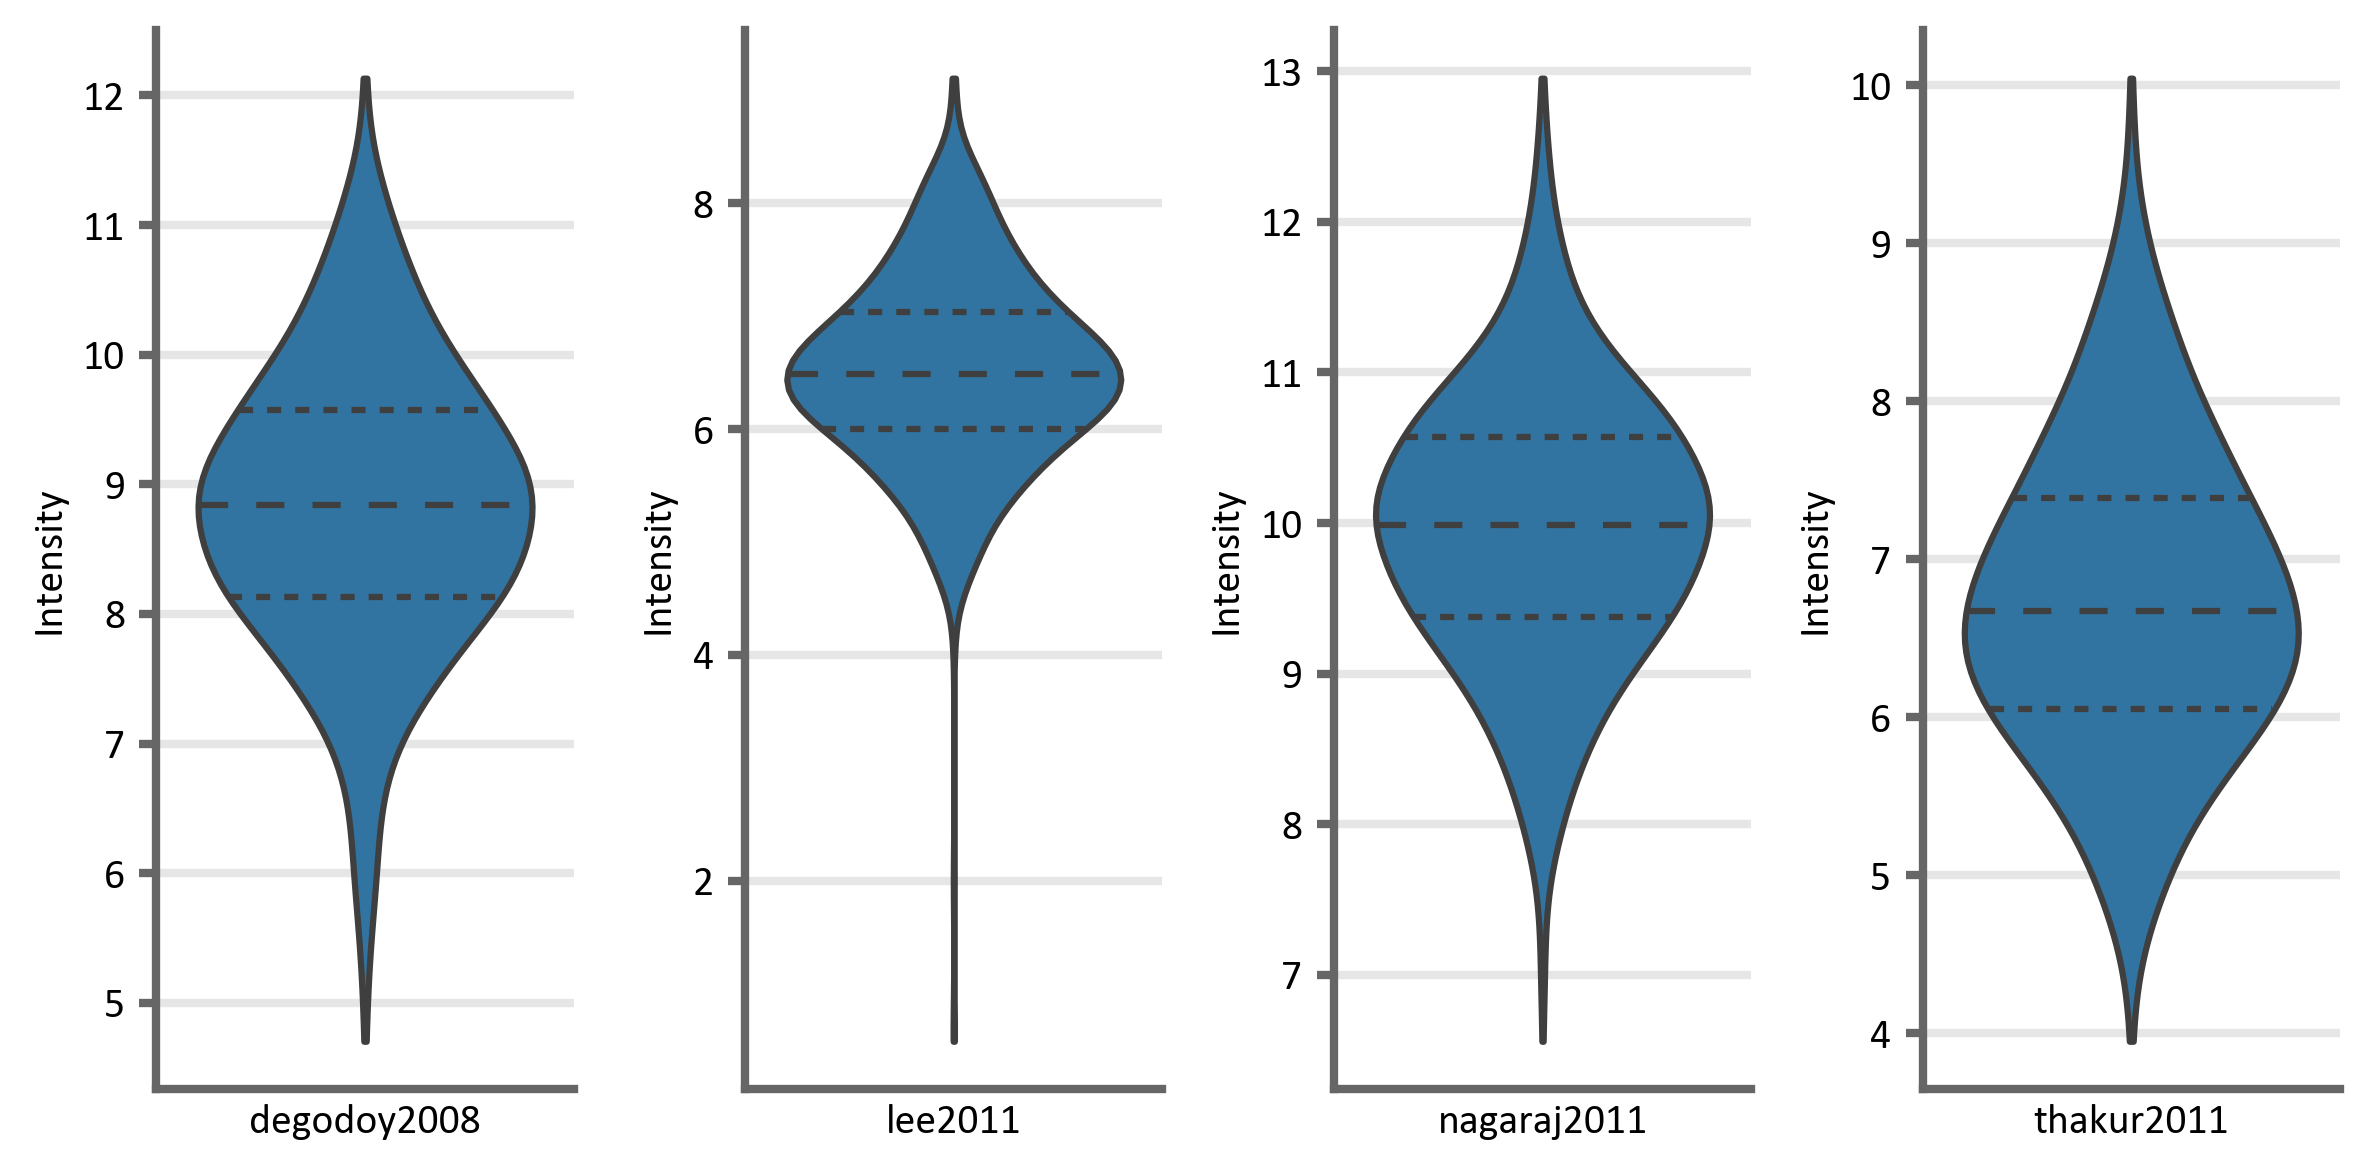

In [146]:
plt.tight_layout()
fig, axs = plt.subplots(1,4, figsize=(8,4))
for i, a in enumerate(axs):
    axs[i].set_ylabel('Intensity')
    sn.violinplot(ax=axs[i], data=articles_aus_lg[i], inner='quartiles', cut=0, scale='count', bw=0.3, palette=['C0'])
    axs[i].set_xticklabels([articles_aus2[i]])
    plt.tight_layout()
plt.savefig('../graphs/2_5_cns_distribution_aus.png')

In [45]:
articles_all = articles_abs6 + articles_aus2
articles_all_data = articles_abs5 + articles_aus

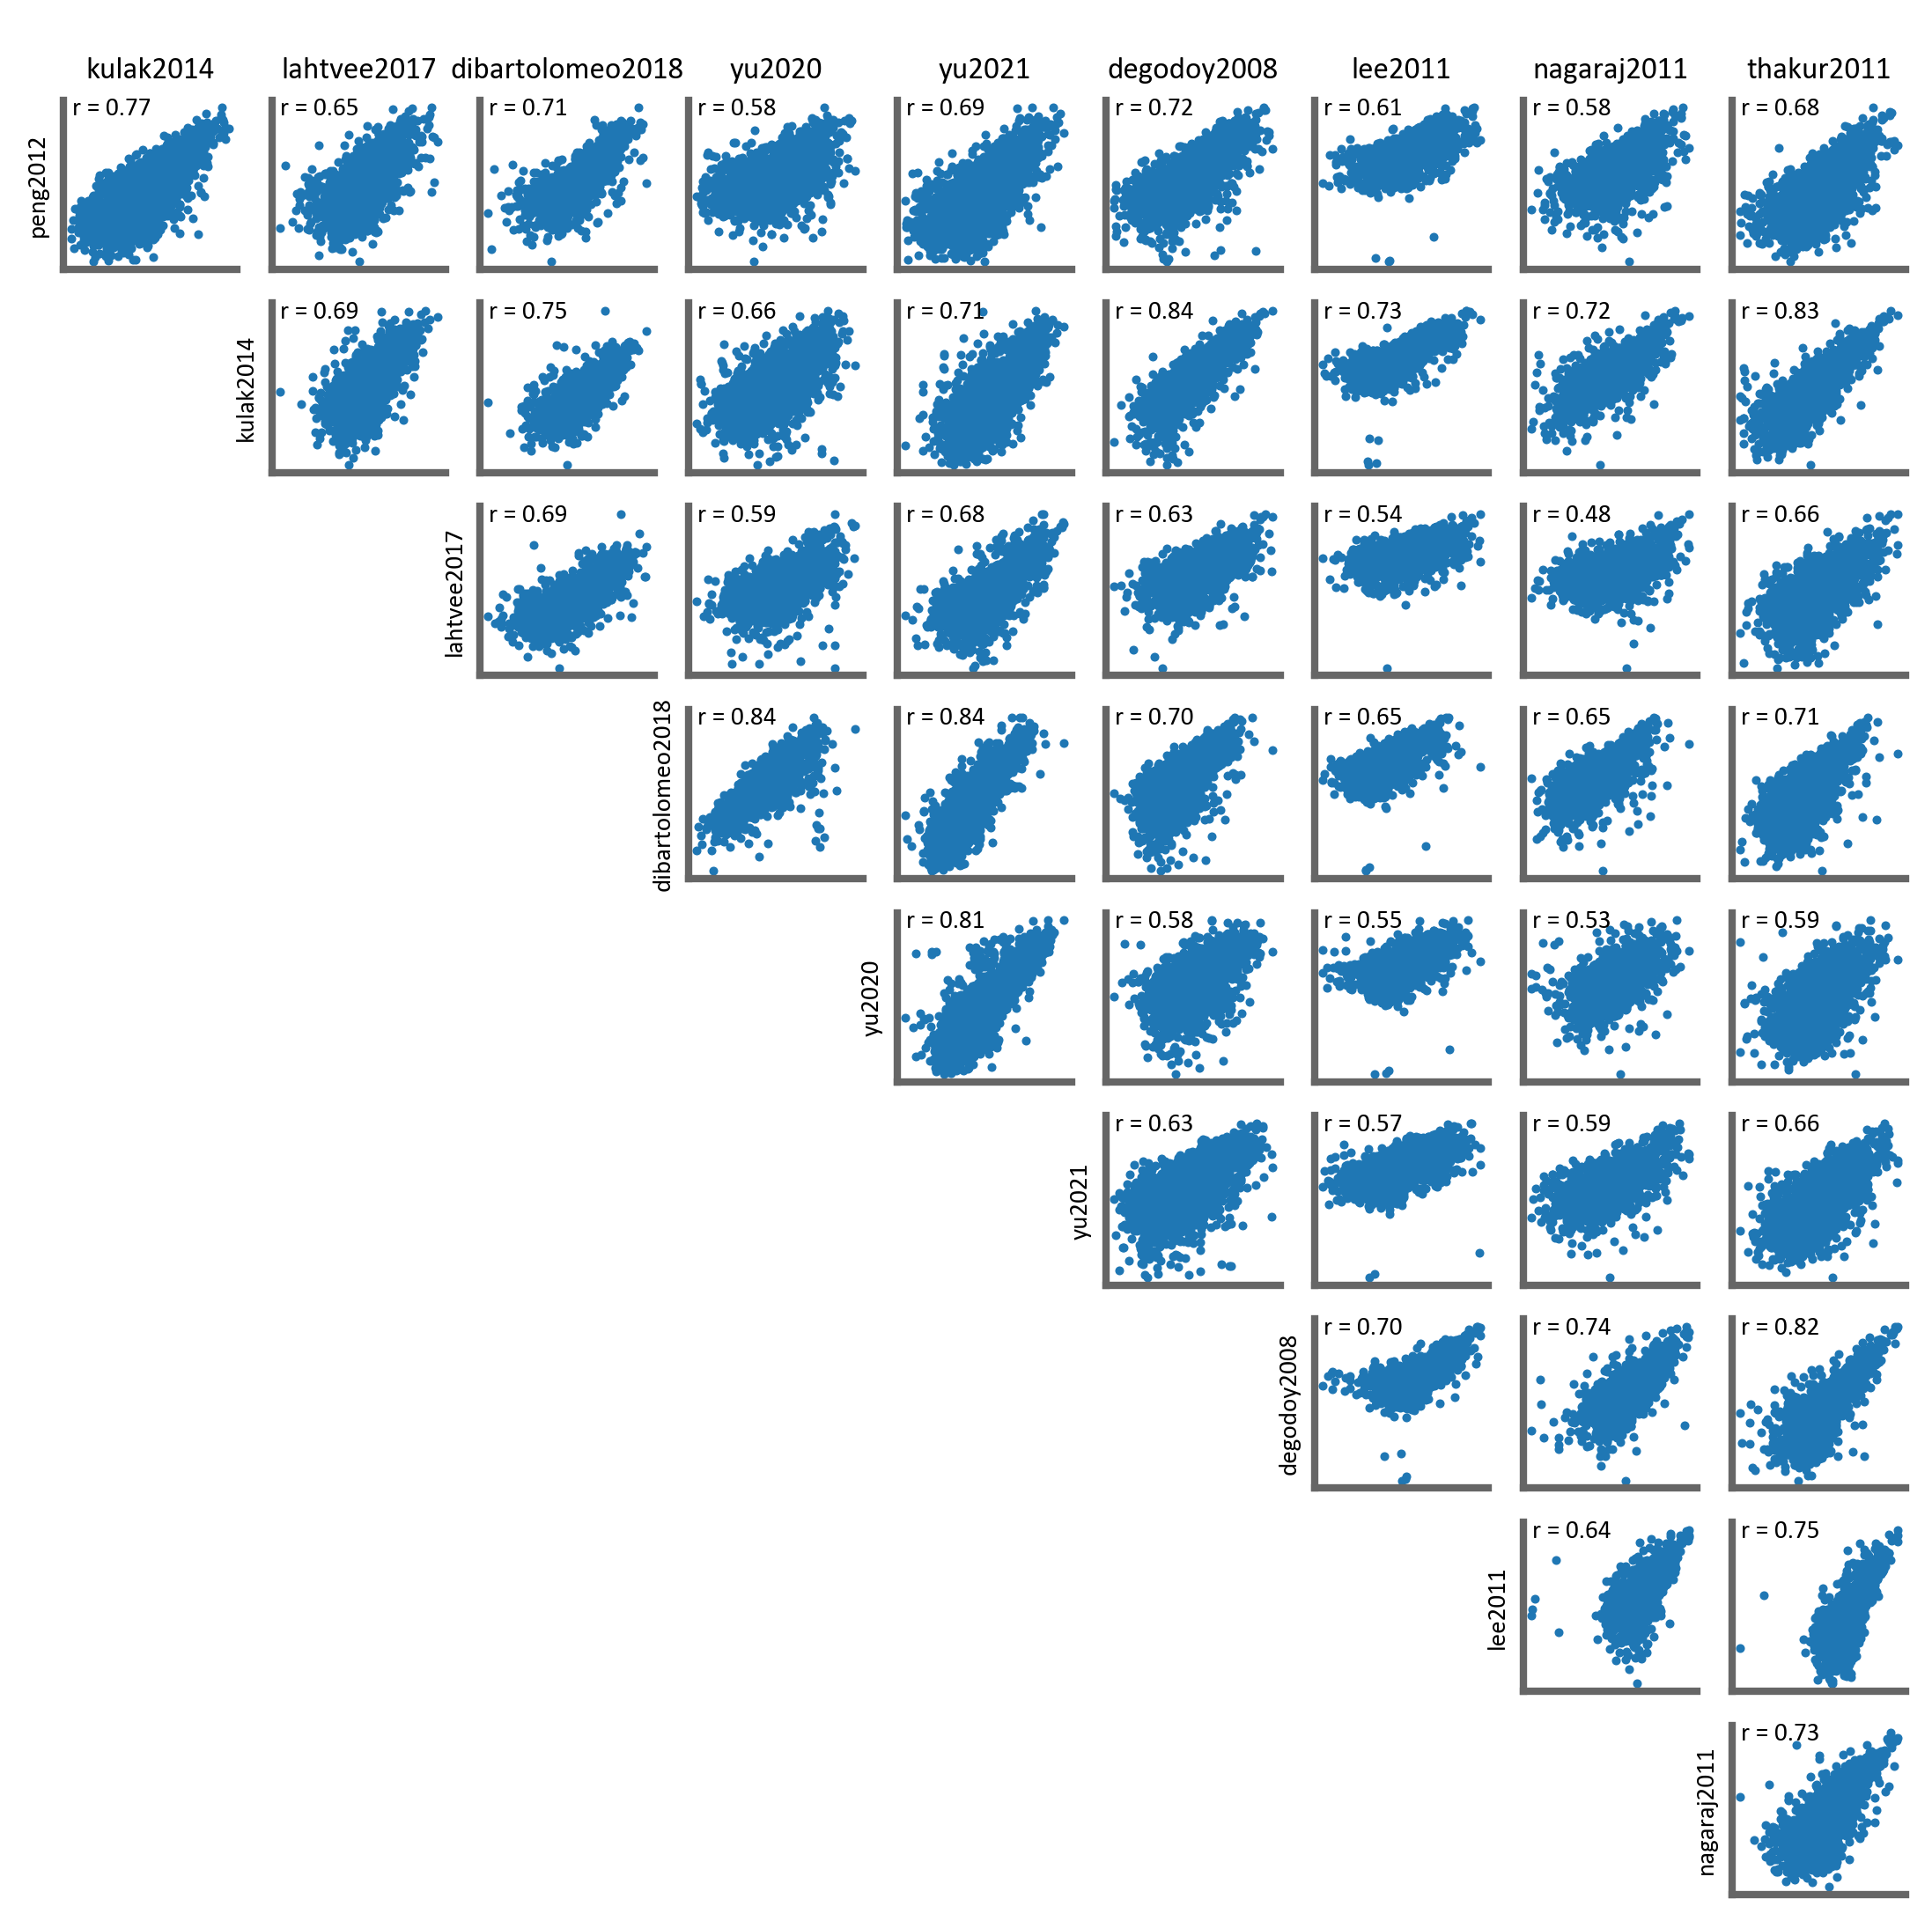

In [211]:
plt.rc('font', size=7)
fig, axs = plt.subplots(nrows=len(articles_all)-1, ncols=len(articles_all)-1, figsize=(9,9))
plt.grid('False')
for i in range(0, len(articles_all)-1):
    for j in range(0, len(articles_all)-1):
        if i > j:
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].set_facecolor('1')
            axs[i][j].spines['bottom'].set_visible(False)
            axs[i][j].spines['left'].set_visible(False)
        
        if i <= j:
            inter = set.intersection(set(articles_all_data[i]['Entry']), set(articles_all_data[j]['Entry']))
            k1 = 'Copies/cell' if i < 6 else 'Intensity'
            k2 = 'Copies/cell' if j < 5 else 'Intensity'
            d1 = np.log(articles_all_data[i][articles_all_data[i]['Entry'].isin(inter)].drop_duplicates('Entry').set_index('Entry')[k1])
            d2 = np.log(articles_all_data[j+1][articles_all_data[j+1]['Entry'].isin(inter)].drop_duplicates('Entry').set_index('Entry')[k2])
            dd = pd.concat([d1,d2], axis=1).dropna()
            #arr1 = ecoli_comb4[(ecoli_comb4[f'ecoli{i+1}'] > 0.0) & (ecoli_comb4[f'ecoli{j+2}'] > 0.0)][f'ecoli{i+1}'].values
            #arr2 = ecoli_comb4[(ecoli_comb4[f'ecoli{i+1}'] > 0.0) & (ecoli_comb4[f'ecoli{j+2}'] > 0.0)][f'ecoli{j+2}'].values
            #axs[i][j].set(xlim=[-1,16], ylim=[-1,16])
            axs[i][j].set_xticks([])
            axs[i][j].set_yticks([])
            axs[i][j].scatter(dd.iloc[:,-2], dd.iloc[:,-1], s=2)
            axs[i][j].text(0.05, 0.91, 'r = {:.2f}'.format(round(pearsonr(dd.iloc[:,-2], dd.iloc[:,-1])[0],2)), transform = axs[i][j].transAxes)
        if i == 0:
            axs[i][j].set_title(articles_all[j+1])
            
        if i==j:
            axs[i][j].set_ylabel(articles_all[i])
            
plt.savefig('../graphs/2_6_correlations.png')

In [175]:
d1 = articles_all_data[1][articles_all_data[1]['Entry'].isin(inter)].set_index('Entry')['Copies/cell']
d2 = articles_all_data[2][articles_all_data[2]['Entry'].isin(inter)].set_index('Entry')['Copies/cell']
pd.concat([d1,d2], axis=1).dropna()

,Copies/cell,Copies/cell
Entry,,
O13297,1561.967994,1408.472489
O13516,92949.368962,50040.521947
O14467,85473.645434,6869.257231
O43137,28773.782369,20516.596490
P00044,1330.282413,58862.881012
...,...,...
Q99312,642.632339,4439.436434
Q99316,1134.360992,5430.300918
Q99369,2545.739238,11014.605215


In [174]:
dd.iloc[:,-1]

4        11230.307260
5         7928.765971
6         6332.763317
8         3699.958989
10        3960.073174
            ...      
1772      2564.493288
1775    117660.392681
1778      7351.921672
1782      1264.069003
1783    603430.954880
Name: Copies/cell, Length: 1074, dtype: float64

In [8]:
mass_avg = []
for i in articles_abs5:
    i['Mass'] = i['Entry'].map(yeast_db.set_index('Entry')['Mass'])
    mass_avg.append((i['Copies/cell']*i['Mass']).sum()/i['Copies/cell'].sum())

In [9]:
mass_avg

[40252.402156379336,
 39590.50234882072,
 39234.67382495371,
 29209.340276544543,
 35505.93072630308,
 34416.17350065487,
 46436.460051622285]

In [10]:
for i in articles_aus:
    i['Mass'] = i['Entry'].map(yeast_db.set_index('Entry')['Mass'])
    mass_avg.append((i['Intensity']*i['Mass']).sum()/i['Intensity'].sum())

In [11]:
mass_avg

[40252.402156379336,
 39590.50234882072,
 39234.67382495371,
 29209.340276544543,
 35505.93072630308,
 34416.17350065487,
 46436.460051622285,
 54897.59757338826,
 55358.50187716359,
 44263.04552024393,
 54453.68483745455]

In [20]:
mass_total = []
for i in articles_abs5:
    i['Mass'] = i['Entry'].map(yeast_db.set_index('Entry')['Mass'])
    mass_total.append((i['Copies/cell']*i['Mass']).sum())

In [22]:
mass_total = [i*1.66054e-12 for i in mass_total]

In [23]:
mass_total

[3.3420361938377003,
 2.8331889490079023,
 6.124470441504606,
 8.937535158936852,
 2.9674779998724725,
 3.159895549807209,
 3.1135613935170805]

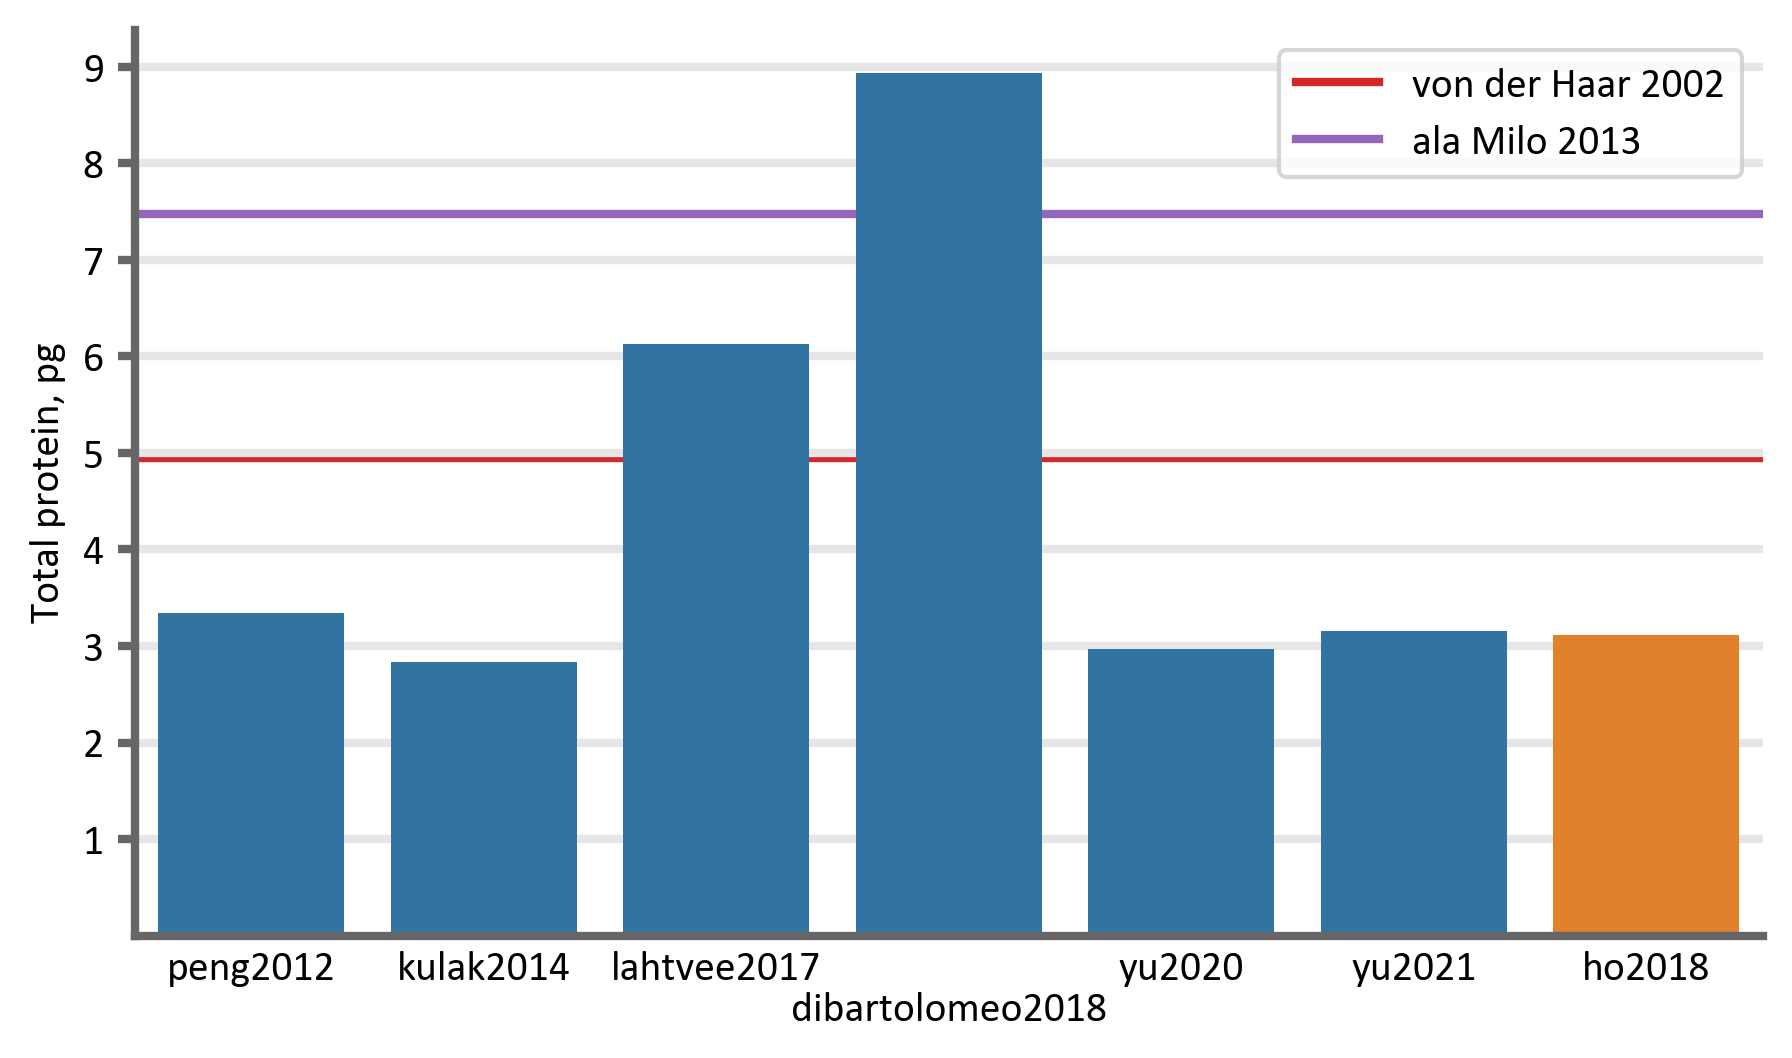

In [42]:
plt.figure(figsize=(7,4))
#plt.grid(True)
sn.barplot(data=[[x] for x in mass_total], palette=['C0','C0','C0','C0','C0','C0','C1'])
plt.xticks(range(len(mass_total)), articles_abs6)
plt.yticks([1,2,3,4,5,6,7,8,9])
sn.lineplot(x=[-1,10], y=[4.95, 4.95], color='C3',zorder=0,scalex=False, linewidth=2, label='von der Haar 2002')
sn.lineplot(x=[-1,10], y=[7.47, 7.47], color='C4',zorder=0,scalex=False, linewidth=2, label='ala Milo 2013')
plt.legend()
plt.ylabel('Total protein, pg')
plt.savefig('../graphs/2_7_total_protein.png')

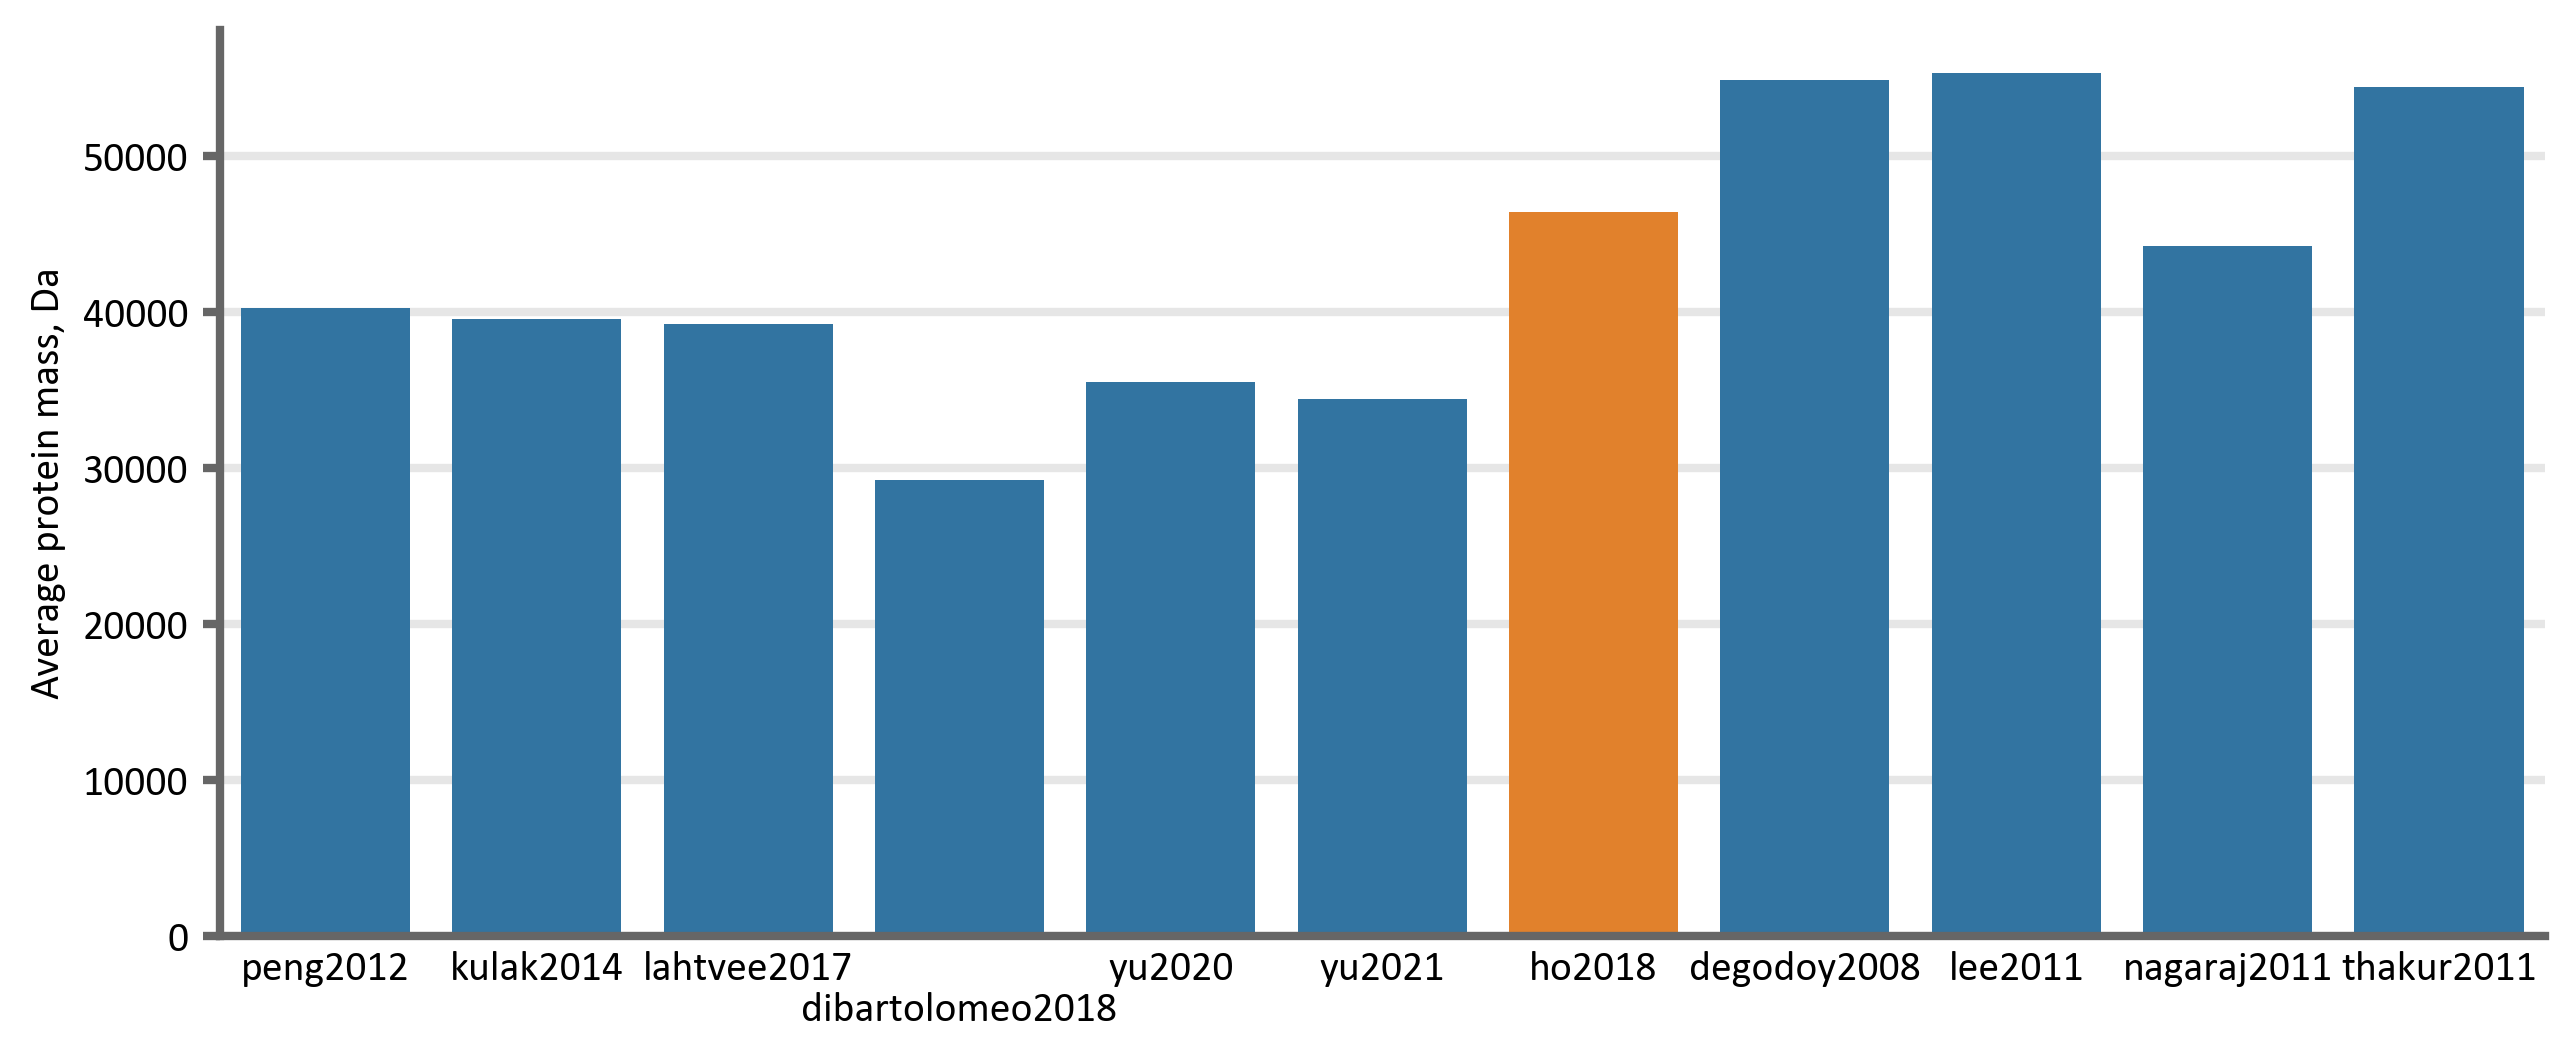

In [49]:
plt.figure(figsize=(10,4))
#plt.grid(True)
sn.barplot(data=[[x] for x in mass_avg], palette=['C0','C0','C0','C0','C0','C0','C1','C0','C0','C0','C0'])
plt.xticks(range(len(mass_avg)), articles_all)
plt.ylabel('Average protein mass, Da')
plt.savefig('../graphs/2_8_average_mass.png')

In [191]:
milo1 = [0.117*6*10**11/i*42 for i in mass_avg]
milo2 = [0.18*6*10**11/i*42 for i in mass_avg]

In [ ]:
yeast_db

In [161]:
def quantify_ribosome_prots1(df, db_ribo):
    ribo_quants = []
    for i in range(len(db_ribo)):
        if db_ribo.iloc[i]['Entry'] in df['Entry'].tolist():
            ribo_quants.append(*df[df['Entry'] == db_ribo.iloc[i]['Entry']]['Copies/cell'].values)
        else:
            ribo_quants.append(0)
    ribo_quants = np.array(ribo_quants)
    ribo_quants = ribo_quants[ribo_quants != 0]
    ll = len(ribo_quants)
    return ribo_quants, ll

def quantify_ribosome_prots2(df, db_ribo):
    ribo_quants = []
    for i in range(max(db_ribo['Ribosomal part'].tolist())):
        db2 = df[df['Entry'].isin(db_ribo[db_ribo['Ribosomal part'] == i+1]['Entry'])]
        if len(db2) >= 1:
            ribo_quants.append(db2['Copies/cell'].sum())
        else:
            ribo_quants.append(0)
    ribo_quants = np.array(ribo_quants)
    ribo_quants = ribo_quants[ribo_quants != 0]
    ll = len(ribo_quants)
    return ribo_quants, ll

In [162]:
q1 = [quantify_ribosome_prots1(i, yeast_db_ribo)[0] for i in articles_abs5]

In [163]:
l1 = [quantify_ribosome_prots1(i, yeast_db_ribo)[1] for i in articles_abs5]

In [164]:
q2 = [quantify_ribosome_prots2(i, yeast_db_ribo)[0] for i in articles_abs5]

In [165]:
l2 = [quantify_ribosome_prots2(i, yeast_db_ribo)[1] for i in articles_abs5]

In [166]:
l1

[79, 67, 56, 95, 94, 92, 138]

In [167]:
l2

[50, 43, 37, 73, 74, 74, 78]

In [109]:
db2 = articles_abs5[0][articles_abs5[0]['Entry'].isin(yeast_db_ribo[yeast_db_ribo['Ribosomal part'] == 1]['Entry'])]

In [110]:
db2

,Entry,Copies/cell,Mass
119,P05755,84251.946551,22299
166,O13516,78715.576981,22443


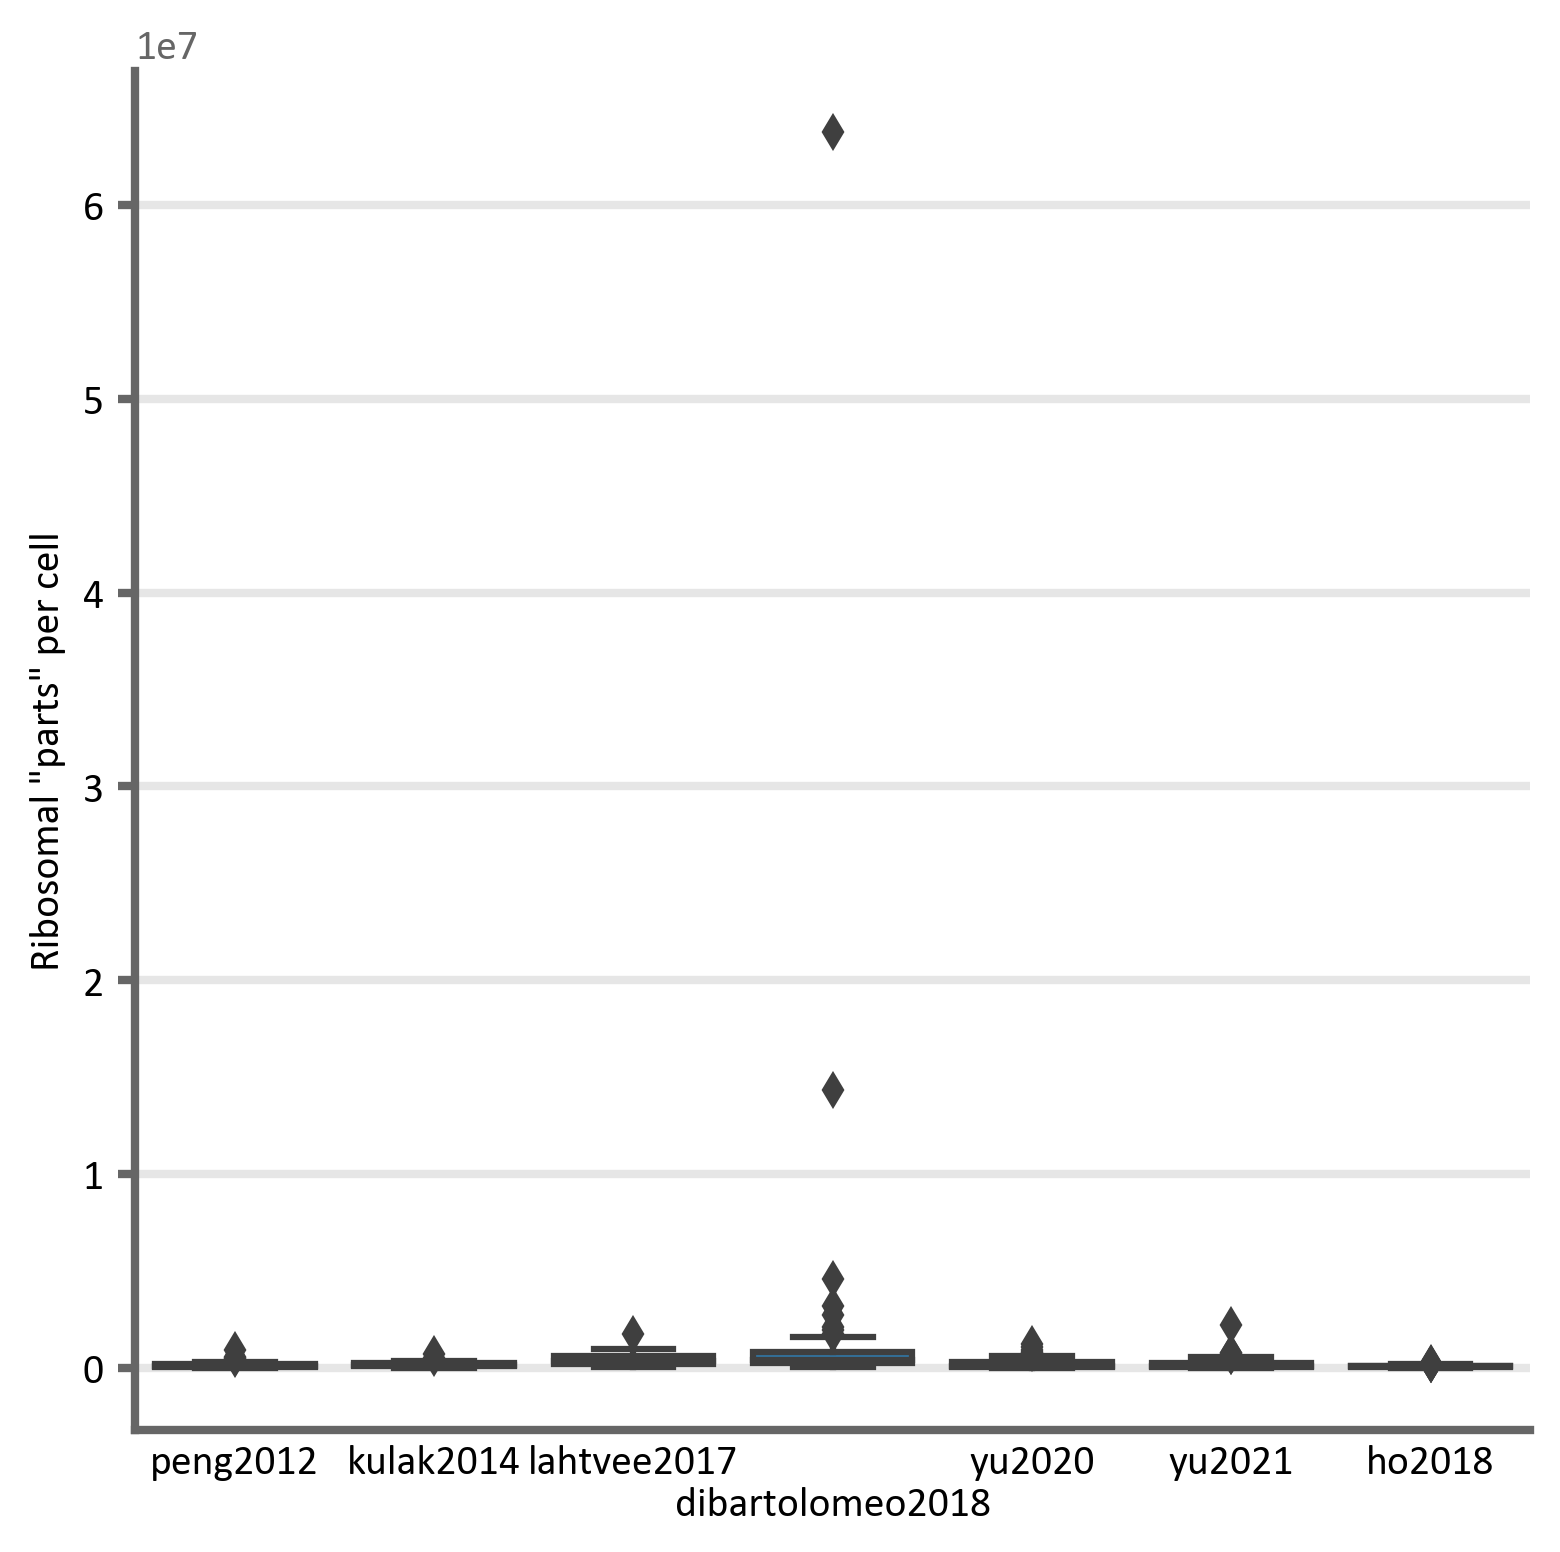

In [185]:
plt.figure(figsize=(6,6))
sn.boxplot(data=q2, palette=['C0'])
#sn.stripplot(data=q2, palette=['C1'])
plt.xticks(range(len(articles_abs6)), articles_abs6)
plt.ylabel('Ribosomal "parts" per cell')
plt.savefig('../graphs/2_9_ribosomal_parts_s.png')

In [153]:
articles_abs5[3][articles_abs5[3]['Entry'].isin(yeast_db_ribo['Entry'])].sort_values('Copies/cell',ascending=False)

,Entry,Copies/cell,Mass
1912,P40212,6.373844e+07,22525
11,O14455,8.136507e+06,11135
117,P05745,6.202274e+06,11124
301,P10664,4.587903e+06,39092
643,P24000,1.953777e+06,17548
...,...,...,...
118,P05748,4.589138e+04,24422
268,P0CX28,4.464782e+04,12212
2357,P49166,1.996919e+04,9850
2757,P56628,1.076536e+03,13827


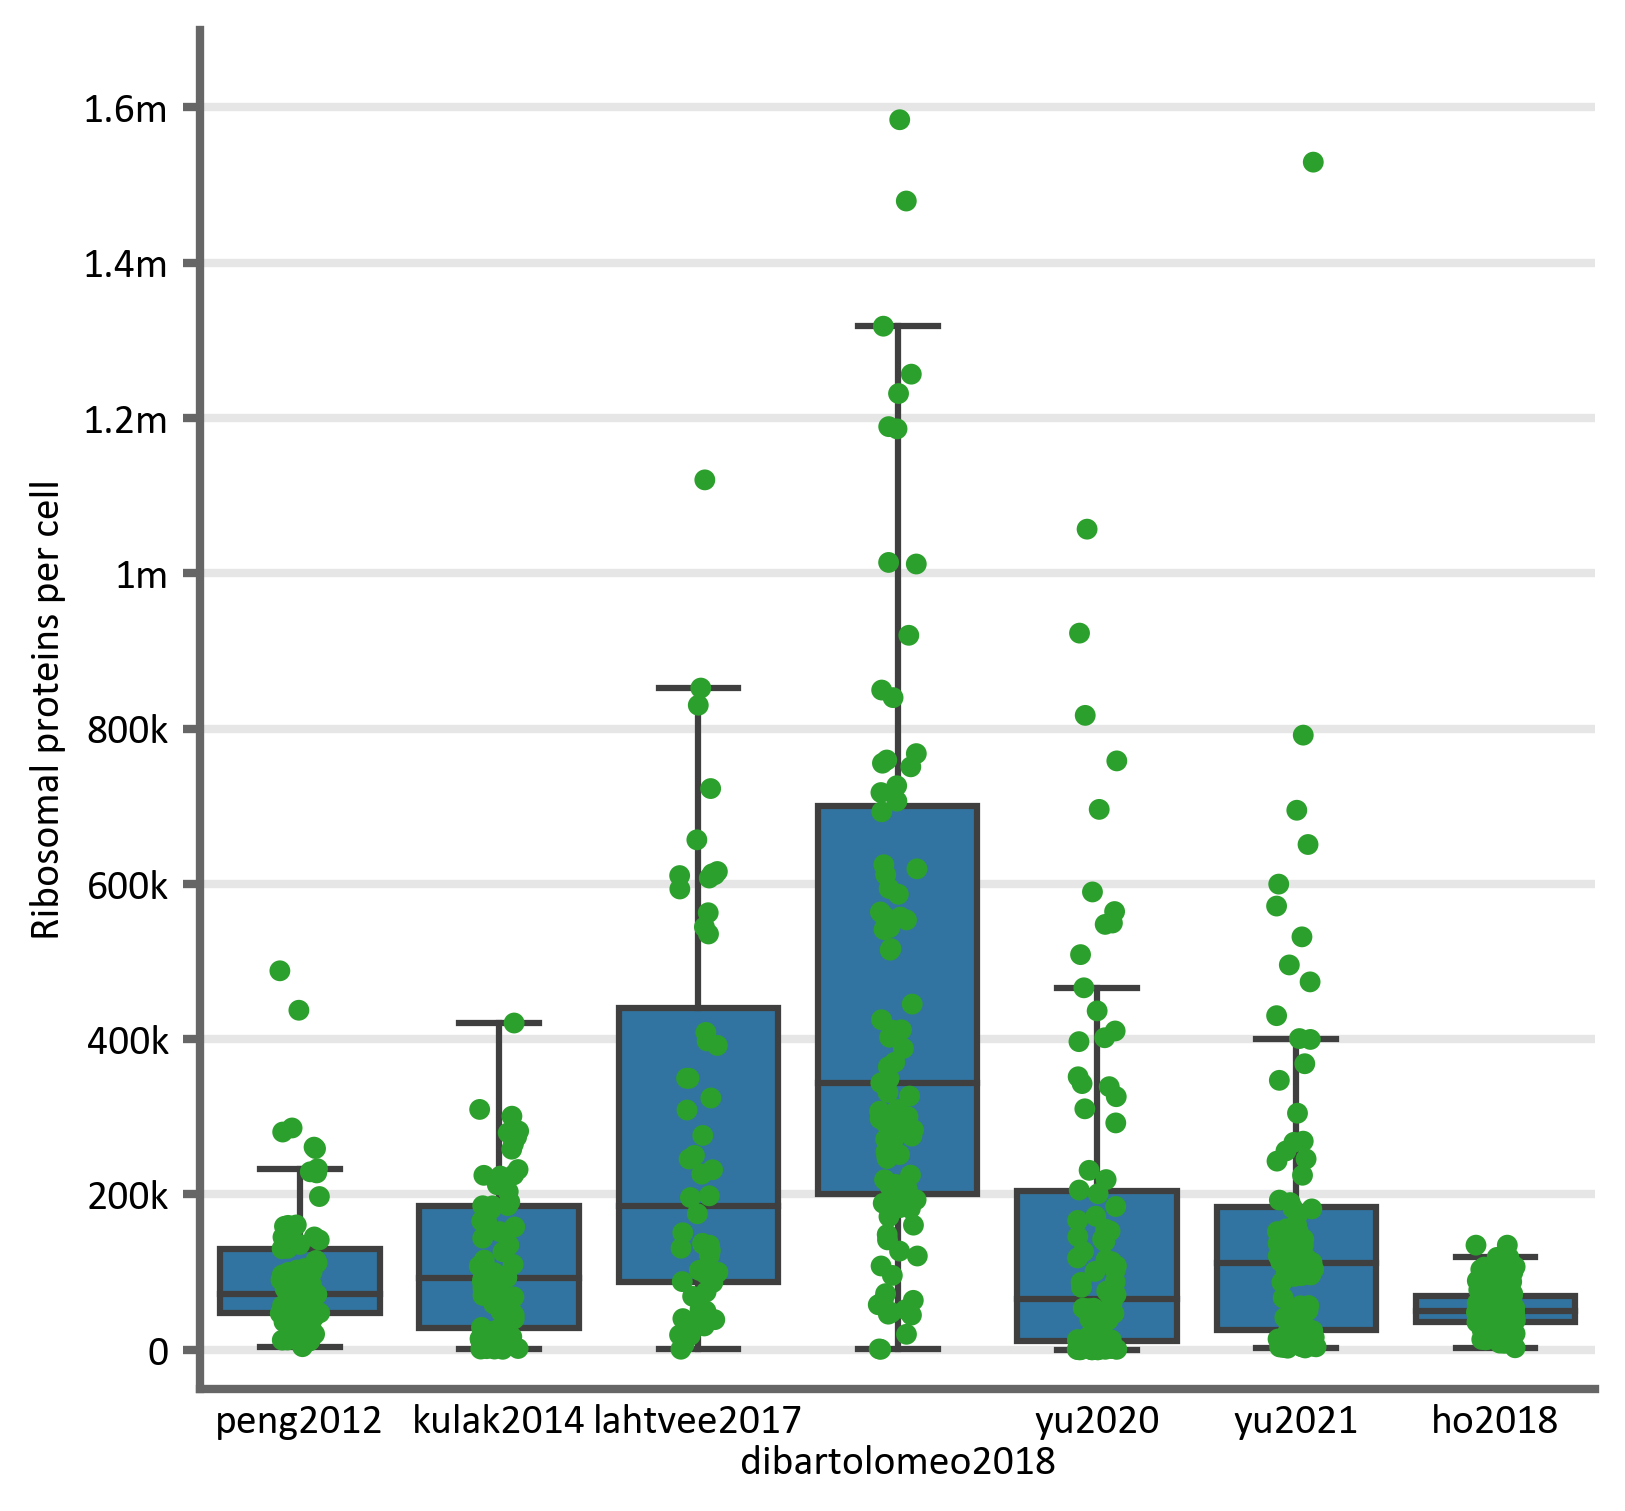

In [183]:
plt.figure(figsize=(6,6))
sn.boxplot(data=q1, palette=['C0'], fliersize = 0)
sn.stripplot(data=q1, palette=['C2'])
plt.xticks(range(len(articles_abs6)), articles_abs6)
plt.ylim([-50000,1700000])
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000], ['0', '200k', '400k', '600k', '800k', '1m', '1.2m', '1.4m', '1.6m'])
plt.ylabel('Ribosomal proteins per cell')
plt.savefig('../graphs/2_10_ribosomal_proteins.png')

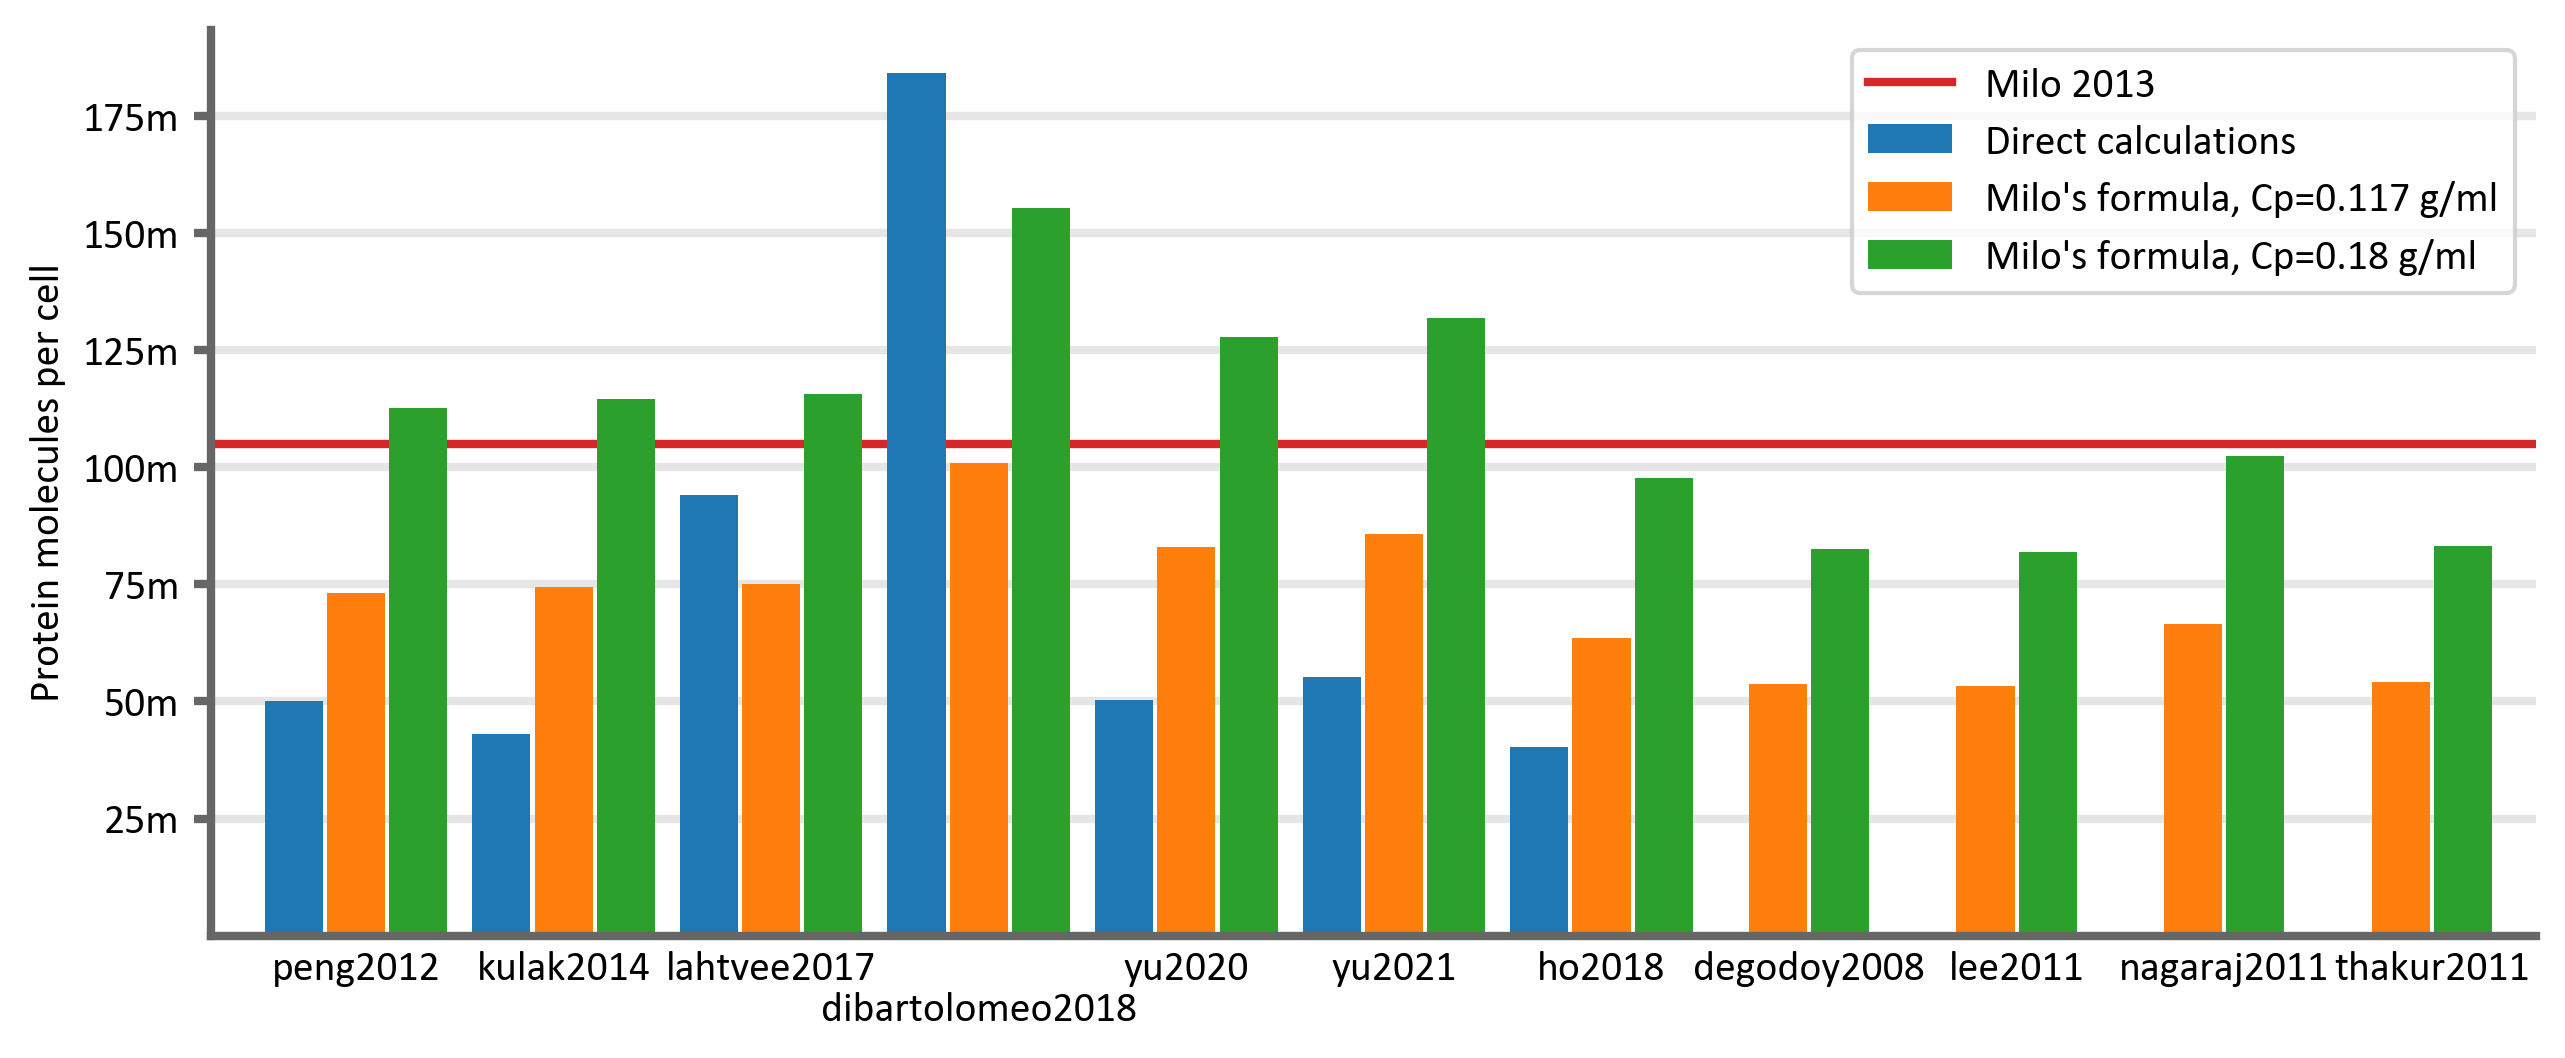

In [211]:
plt.figure(figsize=(10,4))
#plt.grid(True)
abs_x = np.linspace(0,6,7)
aus_x = np.linspace(7,10,4)
plt.plot([-1,12], [105000000,105000000], color='C3', label='Milo 2013',zorder=0,linewidth=2)
plt.bar(abs_x-0.3, total_cns, color='C0', label='Direct calculations', width=0.28)
plt.bar(abs_x, milo1[:7], color='C1', label='Milo\'s formula, Cp=0.117 g/ml', width=0.28)
plt.bar(abs_x+0.3, milo2[:7], color='C2', label='Milo\'s formula, Cp=0.18 g/ml', width=0.28)
plt.bar(aus_x-0.15, milo1[7:], color='C1', width=0.28)
plt.bar(aus_x+0.15, milo2[7:], color='C2', width=0.28)
plt.xticks(range(len(mass_avg)), articles_all)
plt.xlim([-0.7,10.5])
plt.yticks([25000000, 50000000,75000000,100000000,125000000,150000000,175000000], ['25m', '50m', '75m', '100m', '125m', '150m', '175m'])
plt.ylabel('Protein molecules per cell')
plt.legend()
plt.savefig('../graphs/2_12_yeast_all.png')

In [196]:
np.linspace(0,6,7)

array([0., 1., 2., 3., 4., 5., 6.])